In [3]:
pip install google-cloud-bigquery

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import matplotlib
import plotly
import plotly.plotly as py
import squarify
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='/Users/mastermind/Downloads/My First Project-aeea8b3a1dfd.json'

In [5]:
from google.cloud import bigquery

In [6]:
#define client
client = bigquery.Client()

In [7]:
dataset_ref = client.dataset("london_crime", project="bigquery-public-data")
# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [8]:
# List all the tables in the dataset
tables = list(client.list_tables(dataset))
#list all tables-in case there are multiple
for table in tables:  
    print(table.table_id)

crime_by_lsoa


In [9]:
# Construct a reference to the "crime_by_lsoa" table
table_ref = dataset_ref.table("crime_by_lsoa")
# API request - fetch the table
table = client.get_table(table_ref)

In [10]:
# Print information on all the columns in the "crime_by_lsoa" table in the dataset
table.schema

[SchemaField('lsoa_code', 'STRING', 'NULLABLE', 'Lower Layer Super Output Area code according to the Office for National Statistics', ()),
 SchemaField('borough', 'STRING', 'NULLABLE', '', ()),
 SchemaField('major_category', 'STRING', 'NULLABLE', '', ()),
 SchemaField('minor_category', 'STRING', 'NULLABLE', '', ()),
 SchemaField('value', 'INTEGER', 'NULLABLE', 'Summary of the number of crimes for the month', ()),
 SchemaField('year', 'INTEGER', 'NULLABLE', '', ()),
 SchemaField('month', 'INTEGER', 'NULLABLE', '', ())]

In [11]:
bigquery_client = bigquery.Client()

In [12]:
#define query to view the structure of the dataframe
QUERY = """
select * 
from `bigquery-public-data.london_crime.crime_by_lsoa`
limit 1000;
"""

In [13]:
query_job = bigquery_client.query(QUERY)

In [14]:
#storing the dataframe in df
df = query_job.to_dataframe()

In [15]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01000002,City of London,Violence Against the Person,Harassment,0,2011,9
1,E01000005,City of London,Violence Against the Person,Harassment,0,2014,7
2,E01000001,City of London,Violence Against the Person,Harassment,0,2008,3
3,E01032739,City of London,Violence Against the Person,Harassment,0,2016,3
4,E01000001,City of London,Violence Against the Person,Harassment,0,2011,10
5,E01000002,City of London,Violence Against the Person,Harassment,0,2011,3
6,E01032739,City of London,Violence Against the Person,Harassment,0,2009,9
7,E01032739,City of London,Violence Against the Person,Harassment,0,2008,8
8,E01000005,City of London,Violence Against the Person,Harassment,0,2016,5
9,E01032739,City of London,Violence Against the Person,Harassment,0,2012,12


In [16]:
#query for retrieving a dataframe grouped by major and minor category by years and number of recorded cases
QUERY = """
select major_category, minor_category, year, sum(value) as value 
from `bigquery-public-data.london_crime.crime_by_lsoa`
group by major_category, minor_category, year
order by year, major_category, minor_category;
"""

In [17]:
query_job = bigquery_client.query(QUERY)

In [18]:
df1 = query_job.to_dataframe()

In [19]:
df1

,major_category,minor_category,year,value
0,Burglary,Burglary in Other Buildings,2008,31437
1,Burglary,Burglary in a Dwelling,2008,56655
2,Criminal Damage,Criminal Damage To Dwelling,2008,23519
3,Criminal Damage,Criminal Damage To Motor Vehicle,2008,41693
4,Criminal Damage,Criminal Damage To Other Building,2008,9011
5,Criminal Damage,Other Criminal Damage,2008,17649
6,Drugs,Drug Trafficking,2008,4203
7,Drugs,Other Drugs,2008,373
8,Drugs,Possession Of Drugs,2008,64228
9,Fraud or Forgery,Counted per Victim,2008,3840


<BarContainer object of 288 artists>

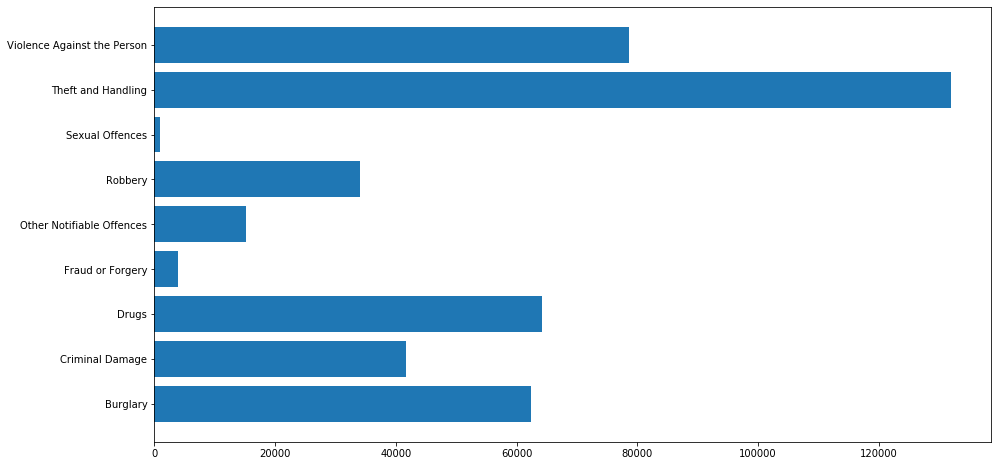

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df1['major_category'], df1['value'])

In [22]:
df1.columns = ['group', 'name', 'year', 'value']
dff = df1
dff

,group,name,year,value
0,Burglary,Burglary in Other Buildings,2008,31437
1,Burglary,Burglary in a Dwelling,2008,56655
2,Criminal Damage,Criminal Damage To Dwelling,2008,23519
3,Criminal Damage,Criminal Damage To Motor Vehicle,2008,41693
4,Criminal Damage,Criminal Damage To Other Building,2008,9011
5,Criminal Damage,Other Criminal Damage,2008,17649
6,Drugs,Drug Trafficking,2008,4203
7,Drugs,Other Drugs,2008,373
8,Drugs,Possession Of Drugs,2008,64228
9,Fraud or Forgery,Counted per Victim,2008,3840


In [23]:
current_year = 2016
dff = df1[df['year'].eq(current_year)].sort_values(by='value', ascending=True).head(10)
dff


/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,group,name,year,value
266,Fraud or Forgery,Other Fraud & Forgery,2016,0
239,Sexual Offences,Other Sexual,2015,0
235,Other Notifiable Offences,Going Equipped,2015,566
171,Other Notifiable Offences,Going Equipped,2013,579
109,Robbery,Business Property,2011,2685
45,Robbery,Business Property,2009,3115
189,Violence Against the Person,Offensive Weapon,2013,3315
125,Violence Against the Person,Offensive Weapon,2011,3991
100,Criminal Damage,Criminal Damage To Other Building,2011,7445
190,Violence Against the Person,Other violence,2013,7628


<BarContainer object of 10 artists>

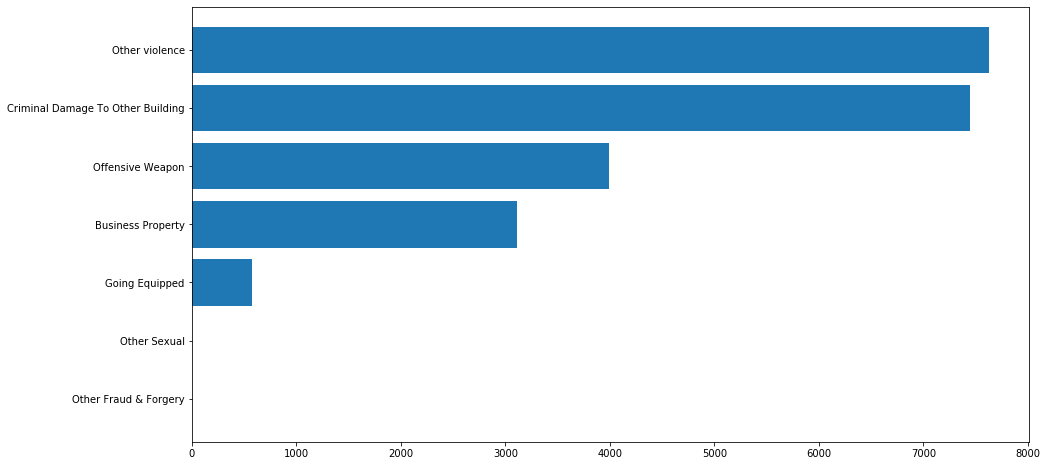

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [25]:
df=dff
df

,group,name,year,value
266,Fraud or Forgery,Other Fraud & Forgery,2016,0
239,Sexual Offences,Other Sexual,2015,0
235,Other Notifiable Offences,Going Equipped,2015,566
171,Other Notifiable Offences,Going Equipped,2013,579
109,Robbery,Business Property,2011,2685
45,Robbery,Business Property,2009,3115
189,Violence Against the Person,Offensive Weapon,2013,3315
125,Violence Against the Person,Offensive Weapon,2011,3991
100,Criminal Damage,Criminal Damage To Other Building,2011,7445
190,Violence Against the Person,Other violence,2013,7628


In [26]:
colors = dict(zip(
    ["Violence Against the Person", "Theft and Handling", "Sexual Offences", "Robbery", "Other Notifiable Offences", "Fraud or Forgery", "Drugs", 'Criminal Damage', 'Burglary'],
    ["#66ff66", "#ccffcc", "#ffff99", "#ffcc00", "#ff9900", "#00ff99", "#33cccc", "#0099ff", "#99ccff"]
))
group_lk = df.set_index('name')['group'].to_dict()

/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


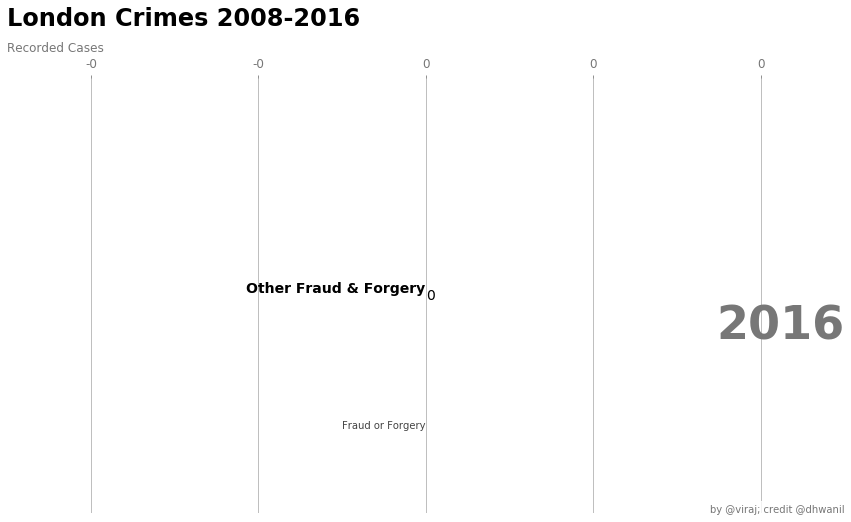

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = df[df1['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Recorded Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'London Crimes 2008-2016',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @viraj; credit @dhwanil', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2016)

/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/mastermi

/Users/mastermind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


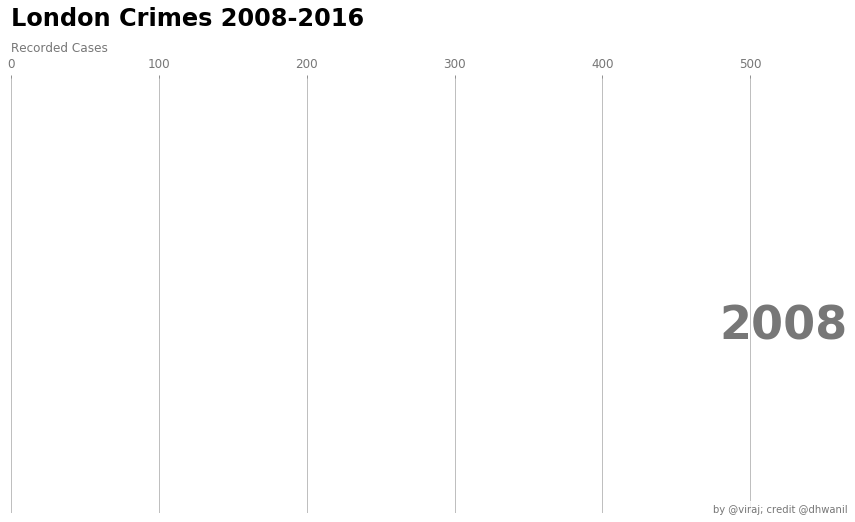

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2008, 2016))
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save()

In the above animation we observe that many years have null values and the transition is not smooth which leads to no 
information being conveyed about the progression over the years. We need to define a query that has continuous values 
distributed over a finite set of categorical variable - thus putting the onus back on data prep.

Lets try defining a query that helps us make good use of the bar chart race.

In [29]:
QUERY = """
select major_category, minor_category, year,sum(value) as total_possesions
from `bigquery-public-data.london_crime.crime_by_lsoa`
where major_category='Theft and Handling'
group by 1,2,3
order by 3 desc
;
"""
query_job = bigquery_client.query(QUERY)
df4 = query_job.to_dataframe()

In [30]:
df4

,major_category,minor_category,year,total_possesions
0,Theft and Handling,Other Theft,2016,103807
1,Theft and Handling,Theft From Shops,2016,46957
2,Theft and Handling,Other Theft Person,2016,34868
3,Theft and Handling,Handling Stolen Goods,2016,1377
4,Theft and Handling,Theft From Motor Vehicle,2016,51319
5,Theft and Handling,Theft/Taking of Pedal Cycle,2016,18001
6,Theft and Handling,Theft/Taking Of Motor Vehicle,2016,26366
7,Theft and Handling,Motor Vehicle Interference & Tampering,2016,11438
8,Theft and Handling,Other Theft,2015,107571
9,Theft and Handling,Theft From Shops,2015,42549


In [31]:
df4.columns = ['group', 'name', 'year', 'value']
dff = df4
dff

,group,name,year,value
0,Theft and Handling,Other Theft,2016,103807
1,Theft and Handling,Theft From Shops,2016,46957
2,Theft and Handling,Other Theft Person,2016,34868
3,Theft and Handling,Handling Stolen Goods,2016,1377
4,Theft and Handling,Theft From Motor Vehicle,2016,51319
5,Theft and Handling,Theft/Taking of Pedal Cycle,2016,18001
6,Theft and Handling,Theft/Taking Of Motor Vehicle,2016,26366
7,Theft and Handling,Motor Vehicle Interference & Tampering,2016,11438
8,Theft and Handling,Other Theft,2015,107571
9,Theft and Handling,Theft From Shops,2015,42549


<BarContainer object of 72 artists>

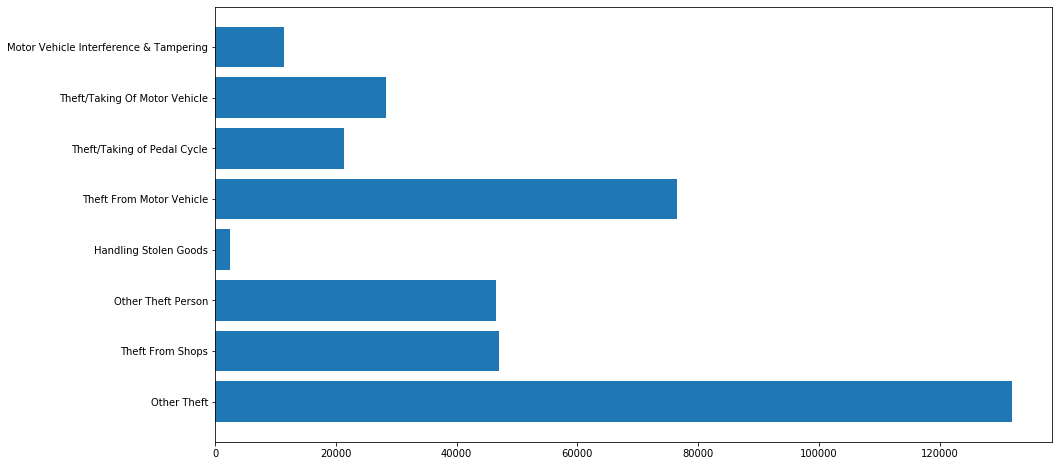

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [33]:
df=dff
df

,group,name,year,value
0,Theft and Handling,Other Theft,2016,103807
1,Theft and Handling,Theft From Shops,2016,46957
2,Theft and Handling,Other Theft Person,2016,34868
3,Theft and Handling,Handling Stolen Goods,2016,1377
4,Theft and Handling,Theft From Motor Vehicle,2016,51319
5,Theft and Handling,Theft/Taking of Pedal Cycle,2016,18001
6,Theft and Handling,Theft/Taking Of Motor Vehicle,2016,26366
7,Theft and Handling,Motor Vehicle Interference & Tampering,2016,11438
8,Theft and Handling,Other Theft,2015,107571
9,Theft and Handling,Theft From Shops,2015,42549


In [34]:
colors = dict(zip(
    ['Theft and Handling'],
    ["#66ff66"]
))
group_lk = df.set_index('name')['group'].to_dict()

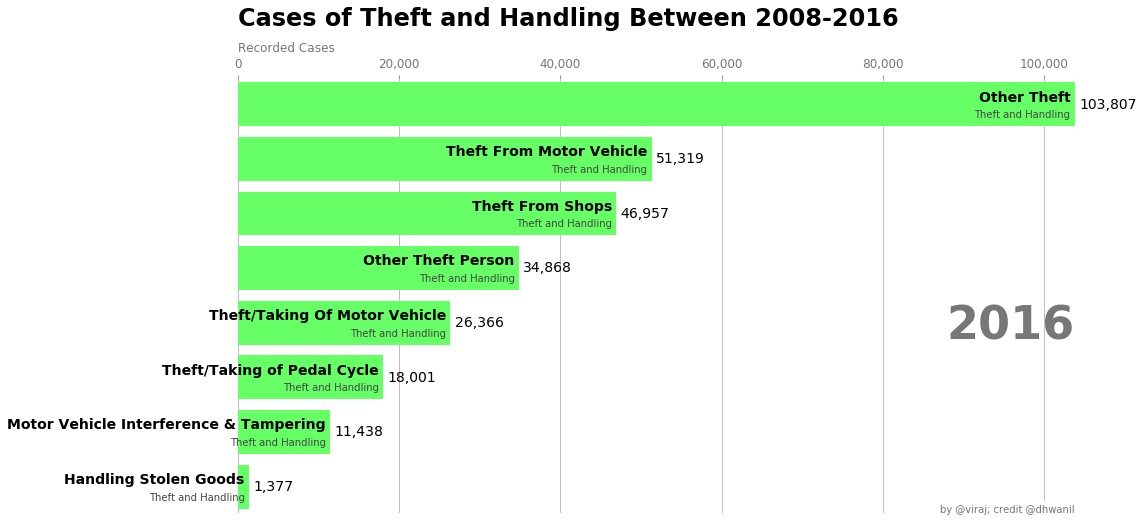

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Recorded Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Cases of Theft and Handling Between 2008-2016',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @viraj; credit @dhwanil', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2016)

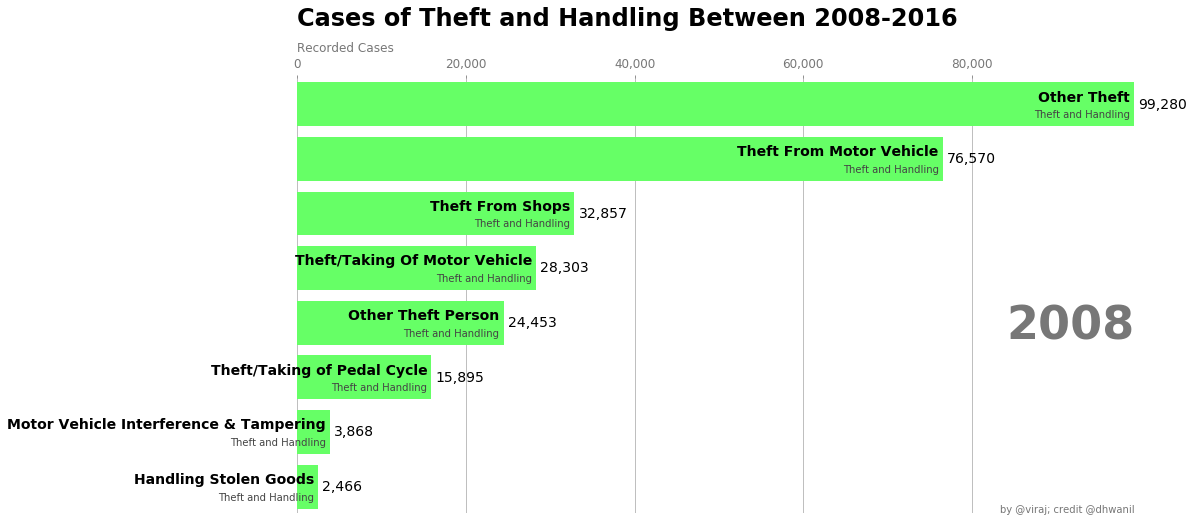

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
# initialization function: plot the background of each frame
#def init():
    #line.set_data([], [])
    #return line,

# animation function.  This is called sequentially
#def animate(i):
    #x.append(np.linspace(i,i+1,n))
    #y.append(np.linspace(a[i],a[i+1],n))
    #line.set_data(x,y)

    #return line,
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2008, 2016), interval =500)
HTML(animator.to_jshtml())

# or use animator.to_html5_video() or animator.save()

This representation looks much better and better conveys the change in the number of recorded cases over the years and
ranks them according the number of cases.

We can now try other visualizations that convey similar information via stacked bar graph, sankey diagram and tree diagram.

In [37]:
QUERY = """
select major_category, year, sum(value) as value 
from `bigquery-public-data.london_crime.crime_by_lsoa`
group by major_category, year
order by year, major_category;
"""
query_job = bigquery_client.query(QUERY)
df2 = query_job.to_dataframe()


In [38]:
df2

,major_category,year,value
0,Burglary,2008,88092
1,Criminal Damage,2008,91872
2,Drugs,2008,68804
3,Fraud or Forgery,2008,5325
4,Other Notifiable Offences,2008,10112
5,Robbery,2008,29627
6,Sexual Offences,2008,1273
7,Theft and Handling,2008,283692
8,Violence Against the Person,2008,159844
9,Burglary,2009,90619


In [39]:
df2.columns = ['Month','Year', 'Value']

IndexError: list index out of range

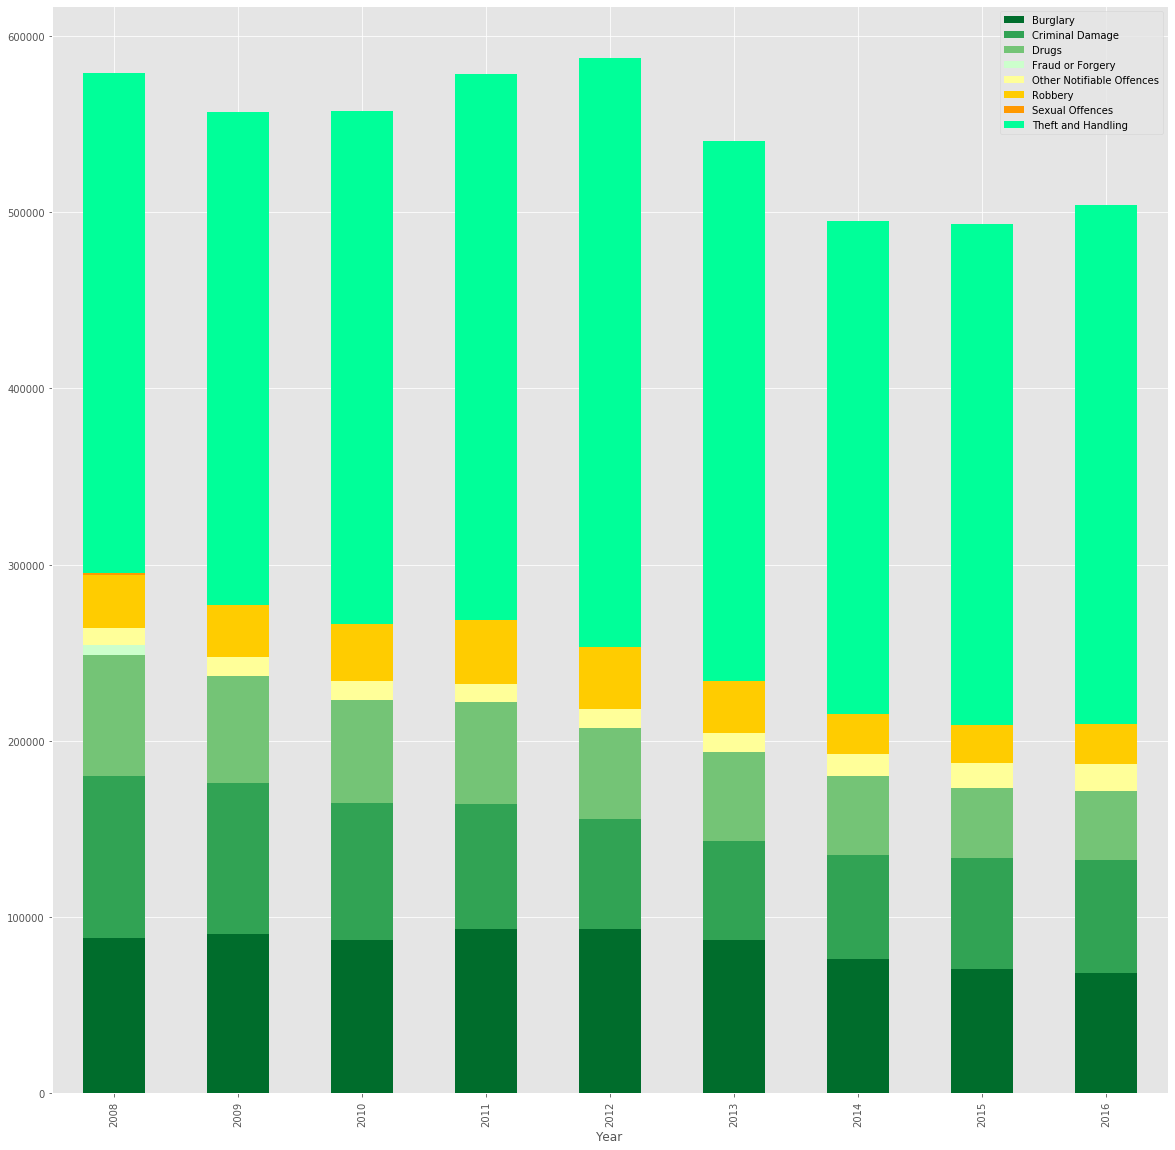

In [41]:
%matplotlib inline

matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20,20))  

months = df2['Month'].drop_duplicates()
margin_bottom = np.zeros(len(df2['Year'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476","#ccffcc", "#ffff99", "#ffcc00", "#ff9900", "#00ff99"]

for num, month in enumerate(months):
    values = list(df2[df2['Month'] == month].loc[:, 'Value'])

    df2[df2['Month'] == month].plot.bar(x='Year',y='Value', ax=ax, stacked=True,bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

plt.show()

In [42]:
df2.columns = ['a', 'b', 'Quantity']

In [53]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#FFD43B','#646464','#4B8BBE','#306998']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

#here we call the previously defined sankey function and we add our dataframe columns to the arguments
fig = genSankey(df2,cat_cols=['a','b'],value_cols='Quantity',title='Sankey Diagram - By years')
plotly.offline.plot(fig, validate=False)

'file:///Users/mastermind/temp-plot.html'

Although pretty, the above sankey diagram looks cluttered, lets try to de-clutter it so that it conveys some insights.

In [45]:
#since the above sankey diagram had too many years in one view, it looked cluttered. Here we write a query that
#retrieves values from the years 2008 and 2016 only
QUERY = """
select minor_category, year,sum(value) as total_possesions
from `bigquery-public-data.london_crime.crime_by_lsoa`
where major_category='Theft and Handling'
and year in (2008,2016)
group by 1,2
order by 2 desc
;
"""
query_job = bigquery_client.query(QUERY)
df3 = query_job.to_dataframe()

In [46]:
#i have changed the column headers everytime since its easier to pass these to my defined sankey function
df3.columns = ['a', 'b', 'Quantity']

In [47]:
df3

,a,b,Quantity
0,Other Theft,2016,103807
1,Theft From Shops,2016,46957
2,Other Theft Person,2016,34868
3,Handling Stolen Goods,2016,1377
4,Theft From Motor Vehicle,2016,51319
5,Theft/Taking of Pedal Cycle,2016,18001
6,Theft/Taking Of Motor Vehicle,2016,26366
7,Motor Vehicle Interference & Tampering,2016,11438
8,Other Theft,2008,99280
9,Theft From Shops,2008,32857


In [48]:
#i have further defined a query that limits the values to only those from 2008
QUERY = """
select minor_category, year,sum(value) as total_possesions
from `bigquery-public-data.london_crime.crime_by_lsoa`
where major_category='Theft and Handling'
and year in (2008)
group by 1,2
order by 2 desc
;
"""
query_job = bigquery_client.query(QUERY)
dfx = query_job.to_dataframe()

In [49]:
dfx

,minor_category,year,total_possesions
0,Other Theft,2008,99280
1,Theft From Shops,2008,32857
2,Other Theft Person,2008,24453
3,Handling Stolen Goods,2008,2466
4,Theft From Motor Vehicle,2008,76570
5,Theft/Taking of Pedal Cycle,2008,15895
6,Theft/Taking Of Motor Vehicle,2008,28303
7,Motor Vehicle Interference & Tampering,2008,3868


In [50]:
dfx.columns = ['a', 'b', 'Quantity']

In [58]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#FFD43B','#646464','#4B8BBE','#306998']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

#here we call the previously defined sankey function and we add our dataframe columns to the arguments
fig = genSankey(df3,cat_cols=['a','b'],value_cols='Quantity',title='Sankey Diagram - Comparison 2008x2016')
plotly.offline.plot(fig, validate=False)

'file:///Users/mastermind/temp-plot.html'

This Sankey Diagram looks much better!

In [55]:
#lets go ahead and try a tree diagram rendition using the dataframe 
!pip install squarify

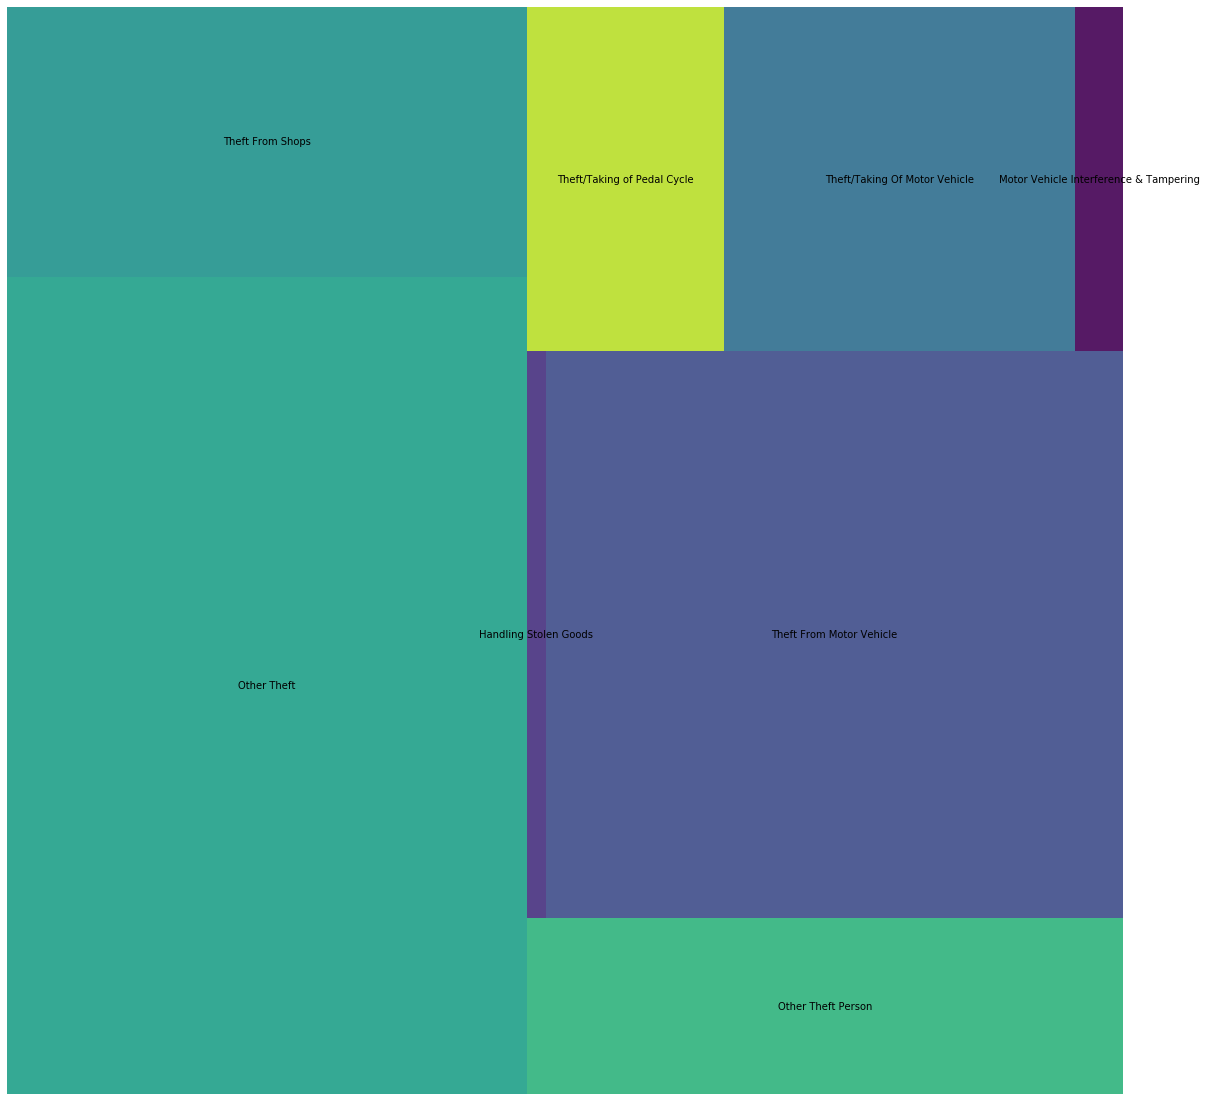

In [57]:
df = dfx
#norm = matplotlib.colors.Normalize(vmin=min(df['a']), vmax=max(df['a']))
#colors = [matplotlib.cm.Blues(norm(value)) for value in df['a']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 20)
squarify.plot(sizes=df['Quantity'], label=df['a'], alpha=.9)
plt.axis('off')
plt.show()

The are many more queries one can write that help us get into granularities packed within this london crime data - however i have limited this code to the above shown EDA. I may create another article with different set of visualizations.
This is it from this article 
FIN!